# Canada GDP Prediction

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as scikit
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load the dataset

In [122]:
path = "API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2752.csv"
dataset = pd.read_csv(path, skiprows=4)

canada_gdp = dataset[dataset['Country Name'] == 'Canada']
canada_gdp = canada_gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

### Reshape the DataFrame
Using melt(), Reshaping the data in 3 columns makes it easier to handle.

#### Notes:

pd.to_numeric(), the errors='coerce' will replace values that can't be converted with NaN.

dropna(subset=['Year', 'GDP']) drops missing values (NaN).

In [123]:
canada_gdp = canada_gdp.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP')
canada_gdp['Year'] = pd.to_numeric(canada_gdp['Year'], errors='coerce')
canada_gdp = canada_gdp.dropna(subset=['Year', 'GDP'])


### Modeling Preperation

In [124]:
X, y = canada_gdp['Year'].values.reshape(-1, 1), canada_gdp['GDP'].values


### Test visualization comparing to World Bank data graph
[World Bank GDP data](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=CA)

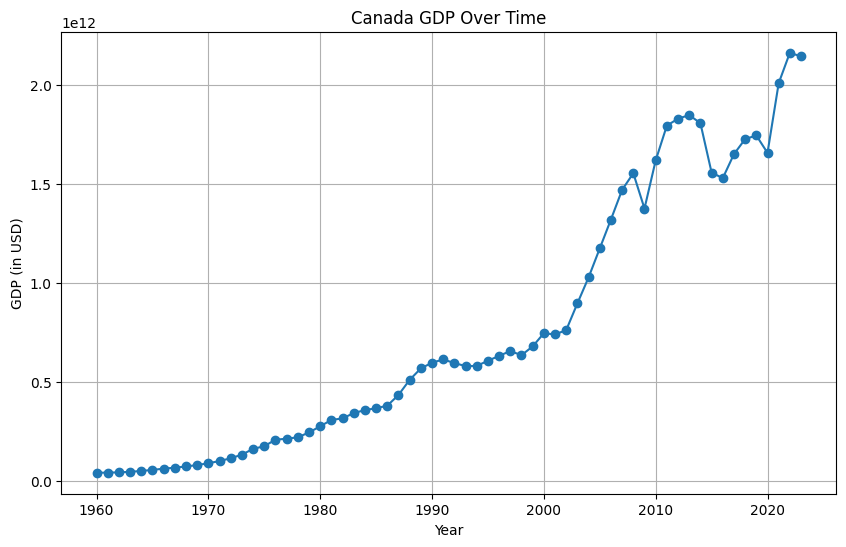

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o')
plt.xlabel('Year')
plt.ylabel('GDP (in USD)')
plt.title('Canada GDP Over Time')
plt.grid(True)
plt.show()


### Split the data into training and testing sets

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Linear Regression Model

In [127]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [128]:
y_pred = reg.predict(X_test)

### Model Evaluation
Using sklearn metrics we can evaluate.

Notes:

- Evaluation metrics are used to tell how close the predications are to reality.

- The closer the R2 Score is to 1 the better the prediction
    - Something about percentage of variance, where 1 explains 100% of the variance


In [129]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2 Score: {r2:.4f}')

MSE: 47379606636025645891584.0000
RMSE: 217668570620.6241
MAE: 181397918615.5135
R2 Score: 0.9073


### Actual vs Predicted Value Graph

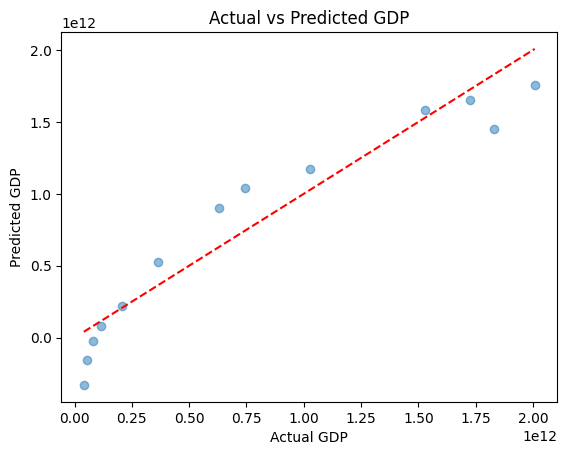

In [130]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.show()

### Residual vs Predicted Graph

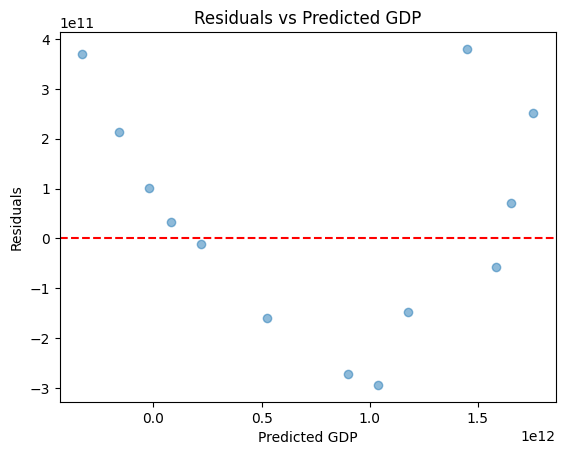

In [131]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted GDP')
plt.show()